### Algorithm: CNN-1D including and data engineering
### Authors: Edgar Acuna  
### Created: August 20, 2024
### Dataset: Ethanol

In [81]:
# cnn lstm model
from numpy import mean
from numpy import std, unique
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
 

In [82]:
import pandas as pd
from aeon.datasets import load_classification
from sklearn import preprocessing

import pandas as pd
from aeon.datasets import load_classification
from sklearn import preprocessing

def load_data(dataset, split="Train"):
    if split=="Train":
        X, y= load_classification(dataset, split="Train")
    else:
        X, y = load_classification(dataset, split="Test")
    print(" Shape of X = ", X.shape)
    print(" Shape of y = ", y.shape)
    #Swap dimensions so features are the third dimension
    X = X.swapaxes(1, 2)
    print(" New shape of X = ", X.shape)
    #prepare y
    y = pd.DataFrame(y)
    enc = preprocessing.OneHotEncoder(dtype=int)
    enc.fit(y)
    y = enc.transform(y).toarray()
    print(" New shape of y = ", y.shape)
    return X, y


In [83]:
# loading Training data
X, y = load_data("EthanolConcentration",split="Train")

 Shape of X =  (261, 3, 1751)
 Shape of y =  (261,)
 New shape of X =  (261, 1751, 3)
 New shape of y =  (261, 4)


In [84]:
import numpy as np
yo=np.argmax(y,axis=1)
yo=np.array(yo,dtype=int)
print(yo)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3]


In [85]:
X1=X[yo==0]
X2=X[yo==1]
X3=X[yo==2]
X4=X[yo==3]
print(X3.shape)

(66, 1751, 3)


In [86]:
Xa1=X1.mean(axis=0).T
Xa1=pd.DataFrame(Xa1)
Xa2=X2.mean(axis=0).T
Xa2=pd.DataFrame(Xa2)
Xa3=X3.mean(axis=0).T
Xa3=pd.DataFrame(Xa3)
Xa4=X4.mean(axis=0).T
Xa4=pd.DataFrame(Xa4)
print(Xa3.shape)

(3, 1751)


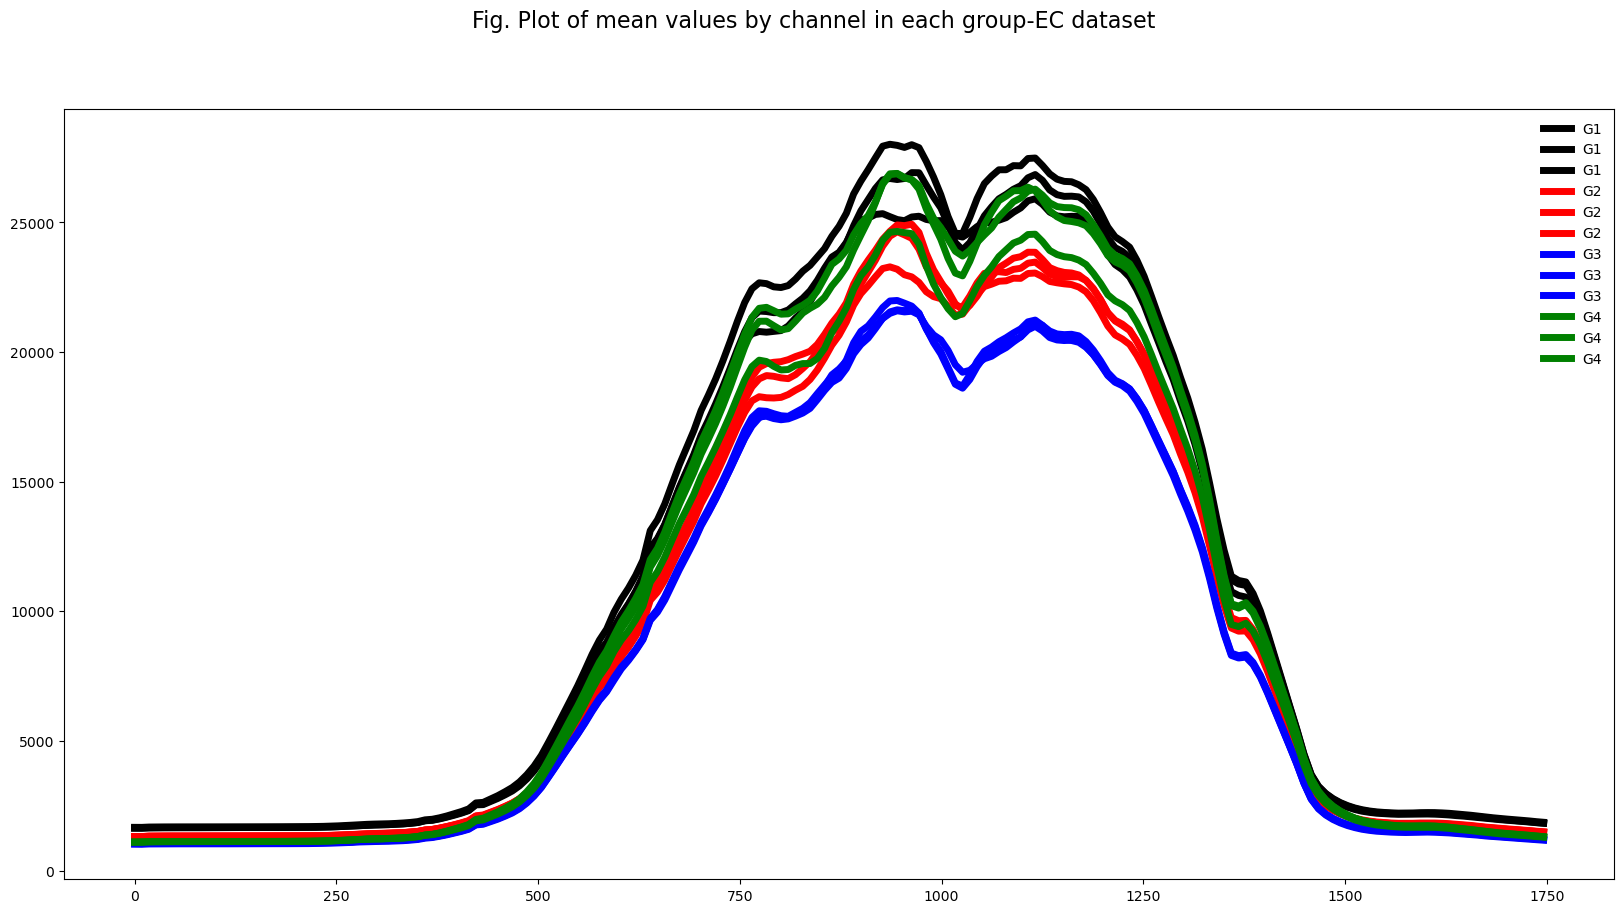

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(20,10))
ejex=range(0,1751,9)
fig.suptitle("Fig. Plot of mean values by channel in each group-EC dataset",fontsize=16)
ax.plot(ejex, Xa1.iloc[0,ejex], color='black',lw=5, label='G1')
ax.plot(ejex,Xa1.iloc[1,ejex], color='black', lw=5, label='G1')
ax.plot(ejex, Xa1.iloc[2,ejex], color='black', lw=5, label='G1')
ax.plot(ejex,Xa2.iloc[0,ejex], color='red', lw=5, label='G2')
ax.plot(ejex, Xa2.iloc[1,ejex], color='red', lw=5, label='G2')
ax.plot(ejex, Xa2.iloc[2,ejex], color='red',lw=5, label='G2')
ax.plot(ejex, Xa3.iloc[0,ejex], color='blue', lw=5, label='G3')
ax.plot(ejex, Xa3.iloc[1,ejex], color='blue',lw=5, label='G3')
ax.plot(ejex,Xa3.iloc[2,ejex], color='blue', lw=5, label='G3')
ax.plot(ejex, Xa4.iloc[0,ejex], color='green', lw=5, label='G4')
ax.plot(ejex, Xa4.iloc[1,ejex], color='green',lw=5, label='G4')
ax.plot(ejex,Xa4.iloc[2,ejex], color='green', lw=5, label='G4')
ax.legend(loc='best', frameon=False)

(457011, 3)


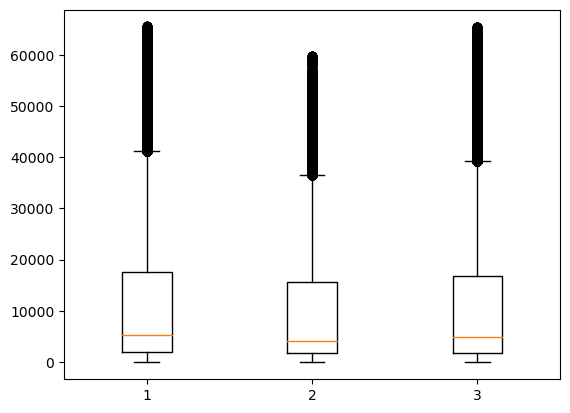

In [88]:
#Boxplots of the features in the training set
tempotr=X.reshape(X.shape[2],-1).T
tempodftr=pd.DataFrame(tempotr)
print(tempodftr.shape)
pyplot.boxplot(tempodftr)
pyplot.show()

array([[<Axes: title={'center': '0'}, xlabel='[group]'>,
        <Axes: title={'center': '1'}, xlabel='[group]'>],
       [<Axes: title={'center': '2'}, xlabel='[group]'>, <Axes: >]],
      dtype=object)

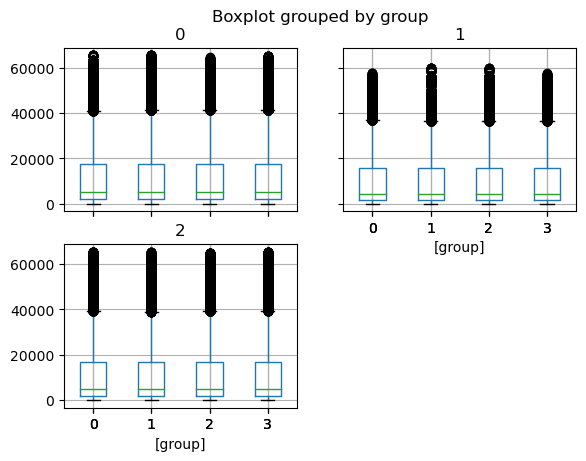

In [89]:
#Boxplots of the features in each group of the training dataset 
temptr=pd.DataFrame(tempotr)
from itertools import cycle
variables= cycle(yo)
print(variables)
temptr['group'] = [next(variables) for variable in range(len(temptr))]
#Bboxplot  of features by class
temptr.boxplot(by='group')

In [90]:
temptr.groupby('group').mean()

,0,1,2
group,,,
0,10960.799896,9086.730488,10032.921326
1,10968.761698,9112.806103,10038.283423
2,10982.792051,9115.648282,10050.498283
3,10976.024954,9097.699394,10054.828884


In [91]:
### Distances

In [92]:
means=temptr.groupby('group').mean()
from scipy.spatial.distance import pdist, squareform

distances = pdist(means, metric='euclidean')
distances

array([27.78632826, 40.35892763, 28.84545677, 18.81838351, 23.55248982,
       19.66495006])

In [93]:
distances.min()

18.818383509305335

In [94]:
distances.max()

40.35892763291088

In [95]:
tempoA=X.reshape(X.shape[1],-1).T
print(tempoA.shape)

(783, 1751)


In [96]:
#media total training
meanTr=tempoA.mean(axis=0)
meanTr.shape

(1751,)

In [97]:
tempoB=pd.DataFrame(tempoA)
from itertools import cycle
variables= cycle(yo)
print(variables)
tempoB['group'] = [next(variables) for variable in range(len(tempoB))]
#Bboxplot  of features by class
a=tempoB.groupby('group').mean()

### Feature Selection

In [98]:
#print(tempoB.shape)
from sklearn.feature_selection import  mutual_info_classif, SelectPercentile, f_classif
ym=tempoB['group']
Xm=tempoB.iloc[:,0:1751]
#scores = mutual_info_classif(Xm,ym)
#scores /= scores.max()
#importance=[i for i,v in enumerate(scores) if v > .5]
#len(importance)*100/206
selector = SelectPercentile(f_classif, percentile=30)
Xm_new=selector.fit_transform(Xm, ym)
scores = -np.log10(selector.pvalues_)
#scores /= scores.max()
#print(scores)
#critical p-value=.10
importance=[i for i,v in enumerate(scores) if v >1 ]
len(importance)*100/1751

94.74585950885208

In [99]:
#Feature selection
from sklearn.feature_selection import  mutual_info_classif
ym=tempoB['group']
Xm=tempoB.iloc[:,0:1751]
scores = mutual_info_classif(Xm,ym)
scores /= scores.max()
importance=[i for i,v in enumerate(scores) if v > .5]
len(importance)*100/1751

33.466590519703026

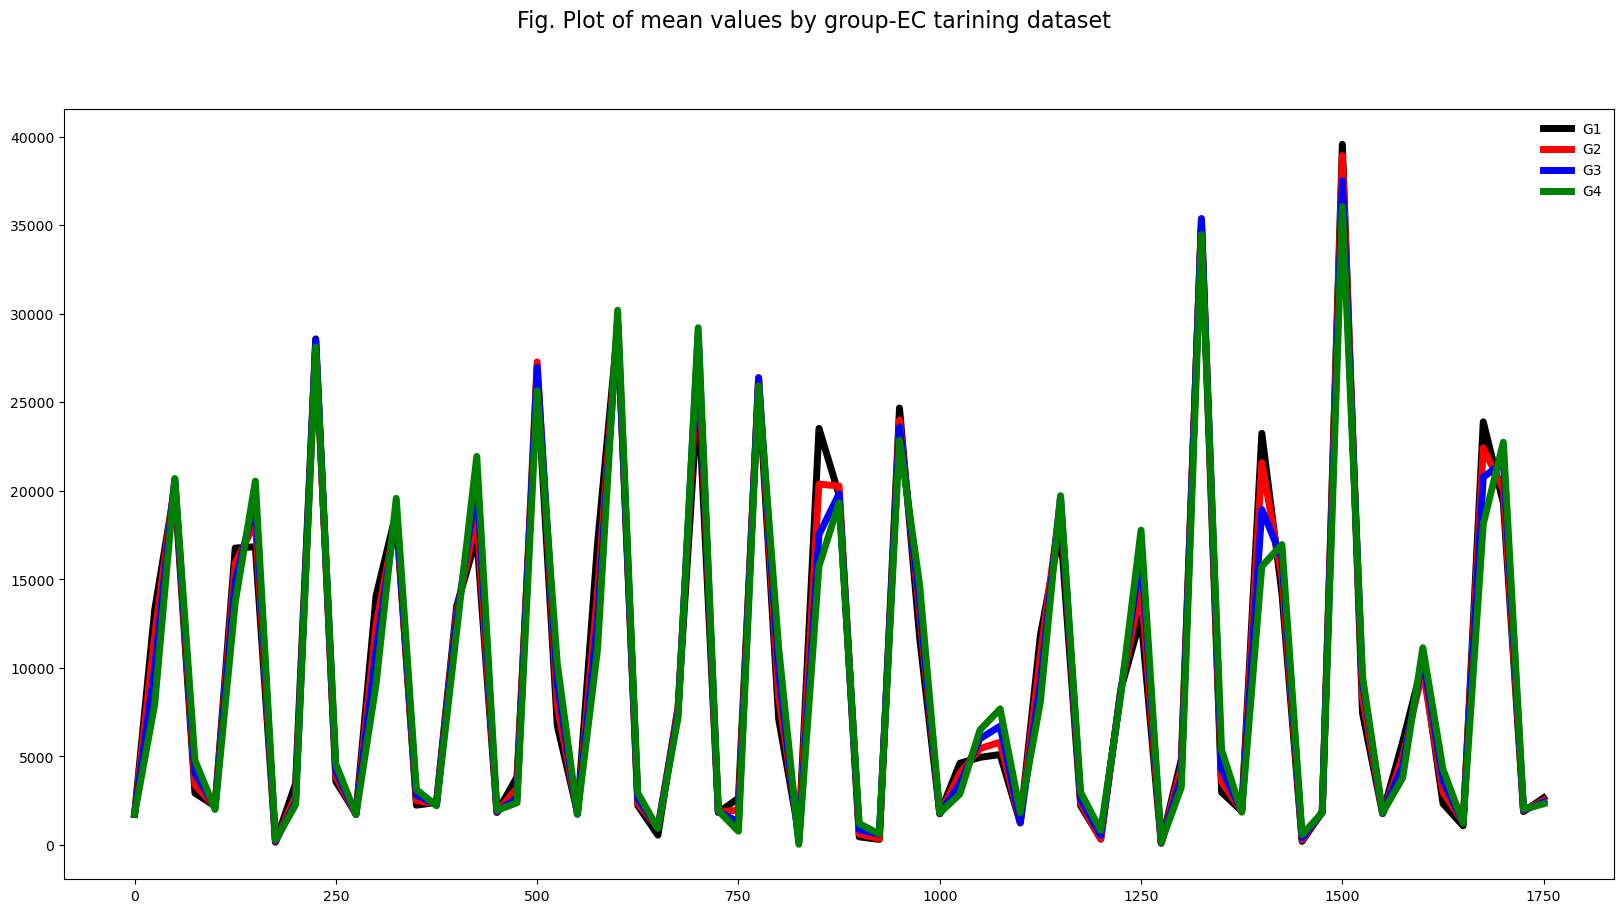

In [100]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(20,10))
ejex=range(0,1751,25)
fig.suptitle("Fig. Plot of mean values by group-EC tarining dataset",fontsize=16)
ax.plot(ejex, a.iloc[0,ejex], color='black',lw=5, label='G1')
ax.plot(ejex,a.iloc[1,ejex], color='red', lw=5, label='G2')
ax.plot(ejex, a.iloc[2,ejex], color='blue', lw=5, label='G3')
ax.plot(ejex, a.iloc[3,ejex], color='green', lw=5, label='G4')
ax.legend(loc='best', frameon=False)

In [101]:
# loading Testing data
Xt, yt = load_data("EthanolConcentration",split="Test")

 Shape of X =  (263, 3, 1751)
 Shape of y =  (263,)
 New shape of X =  (263, 1751, 3)
 New shape of y =  (263, 4)


In [102]:
yto=np.argmax(yt,axis=1)
yto=np.array(yto,dtype=int)
#print(yto)

In [103]:
#class size in testing
import numpy as np
np.sum(yt,axis=0)

array([66, 66, 66, 65])

In [104]:
ar=np.sum(yt,axis=0)
np.max(ar/Xt.shape[0])

0.2509505703422053

(460513, 3)


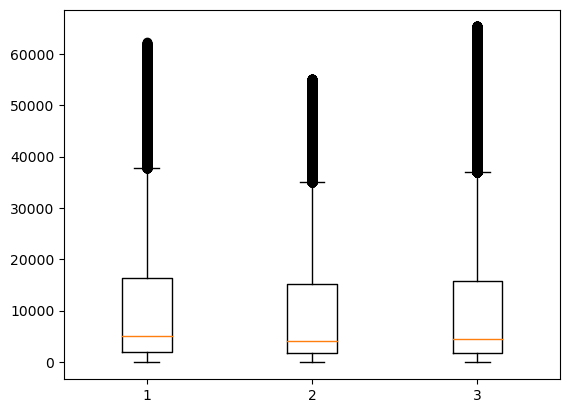

In [105]:
#Boxplots of features in the testing dataset
tempote=Xt.reshape(Xt.shape[2],-1).T
tempodfte=pd.DataFrame(tempote)
print(tempodfte.shape)
pyplot.boxplot(tempodfte)
pyplot.show()

array([[<Axes: title={'center': '0'}, xlabel='[group]'>,
        <Axes: title={'center': '1'}, xlabel='[group]'>],
       [<Axes: title={'center': '2'}, xlabel='[group]'>, <Axes: >]],
      dtype=object)

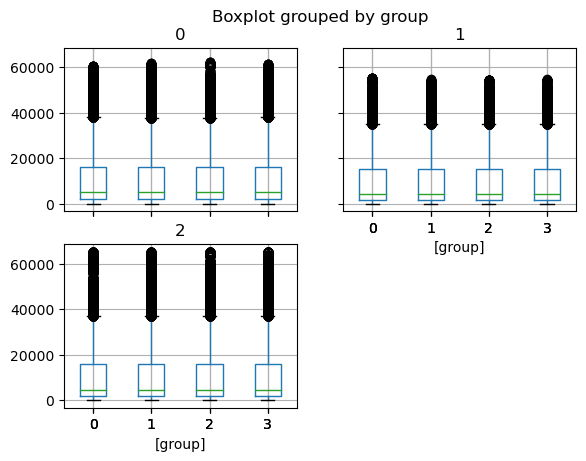

In [106]:
#Boxplots of features in each group of the testing dataset
tempte=pd.DataFrame(tempote)
from itertools import cycle
variables= cycle(yto)
print(variables)
tempte['group'] = [next(variables) for variable in range(len(tempte))]
#Boxplot  of features by class in testing
tempte.boxplot(by='group')

array([[<Axes: title={'center': '0'}, xlabel='[group]'>,
        <Axes: title={'center': '1'}, xlabel='[group]'>],
       [<Axes: title={'center': '2'}, xlabel='[group]'>, <Axes: >]],
      dtype=object)

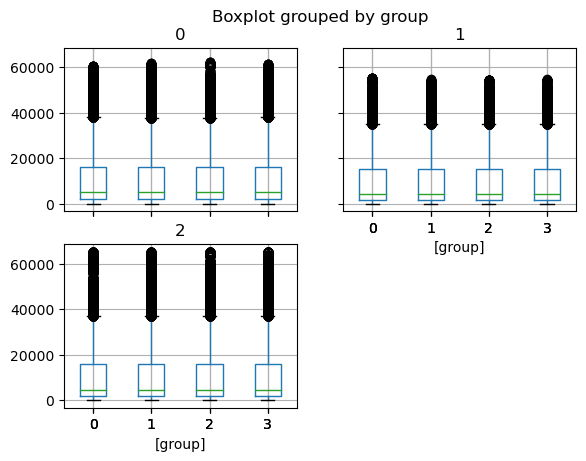

In [107]:
tempte=pd.DataFrame(tempote)
from itertools import cycle
variables= cycle(yto)
print(variables)
tempte['group'] = [next(variables) for variable in range(len(tempte))]
#Boxplot  of features by class in testing
tempte.boxplot(by='group')

In [108]:
tempoA1=Xt.reshape(Xt.shape[1],-1).T
print(tempoA1.shape)

(789, 1751)


In [109]:
tempoB1=pd.DataFrame(tempoA1)
from itertools import cycle
variables= cycle(yto)
print(variables)
tempoB1['group'] = [next(variables) for variable in range(len(tempoB1))]
#Bboxplot  of features by class
a1=tempoB1.groupby('group').mean()

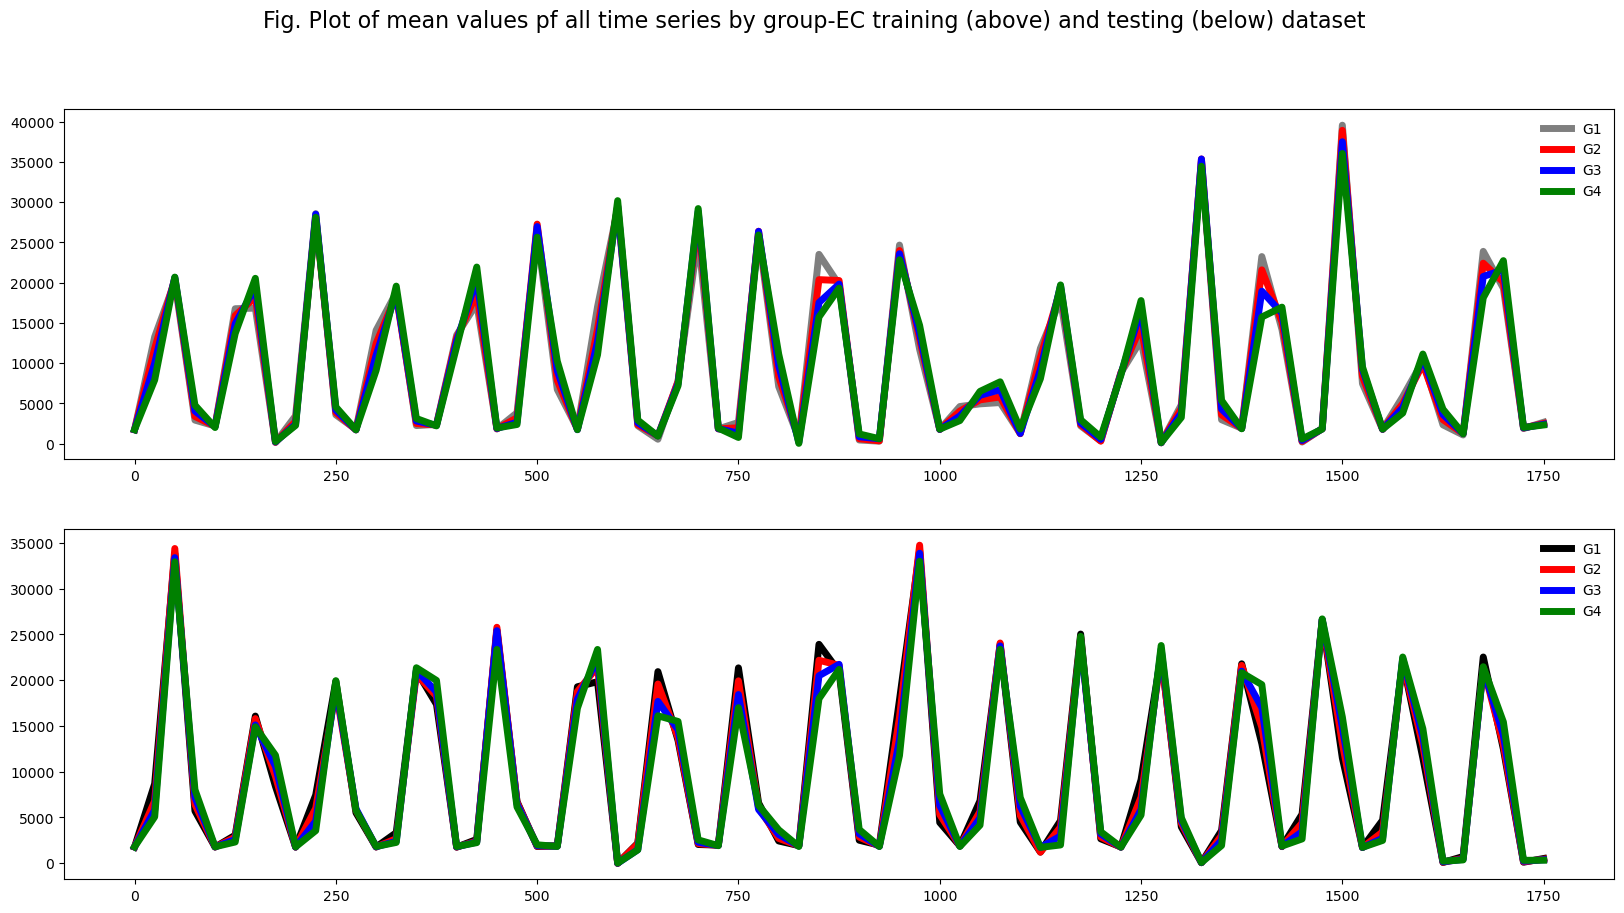

In [110]:
import matplotlib.pyplot as plt
%matplotlib inline
#f = plt.figure(figsize=(10,3))
fig, (ax1, ax2) = plt.subplots(2,figsize=(20,10))
#fig, ax = plt.subplots(figsize=(20,10))
ejex=range(0,1751,25)
fig.suptitle("Fig. Plot of mean values pf all time series by group-EC training (above) and testing (below) dataset",fontsize=16)
ax1.plot(ejex, a.iloc[0,ejex], color='black',lw=5, alpha=0.5, label='G1')
ax1.plot(ejex,a.iloc[1,ejex], color='red', lw=5, label='G2')
ax1.plot(ejex, a.iloc[2,ejex], color='blue', lw=5, label='G3')
ax1.plot(ejex, a.iloc[3,ejex], color='green', lw=5,  label='G4')
ax1.legend(loc='best', frameon=False)
#fig.suptitle("Fig. Plot of mean values by group-EC test dataset",fontsize=16)
ax2.plot(ejex, a1.iloc[0,ejex], color='black',lw=5, label='G1')
ax2.plot(ejex,a1.iloc[1,ejex], color='red', lw=5, label='G2')
ax2.plot(ejex, a1.iloc[2,ejex], color='blue', lw=5,  label='G3')
ax2.plot(ejex, a1.iloc[3,ejex], color='green', lw=5,  label='G4')
ax2.legend(loc='best', frameon=False)

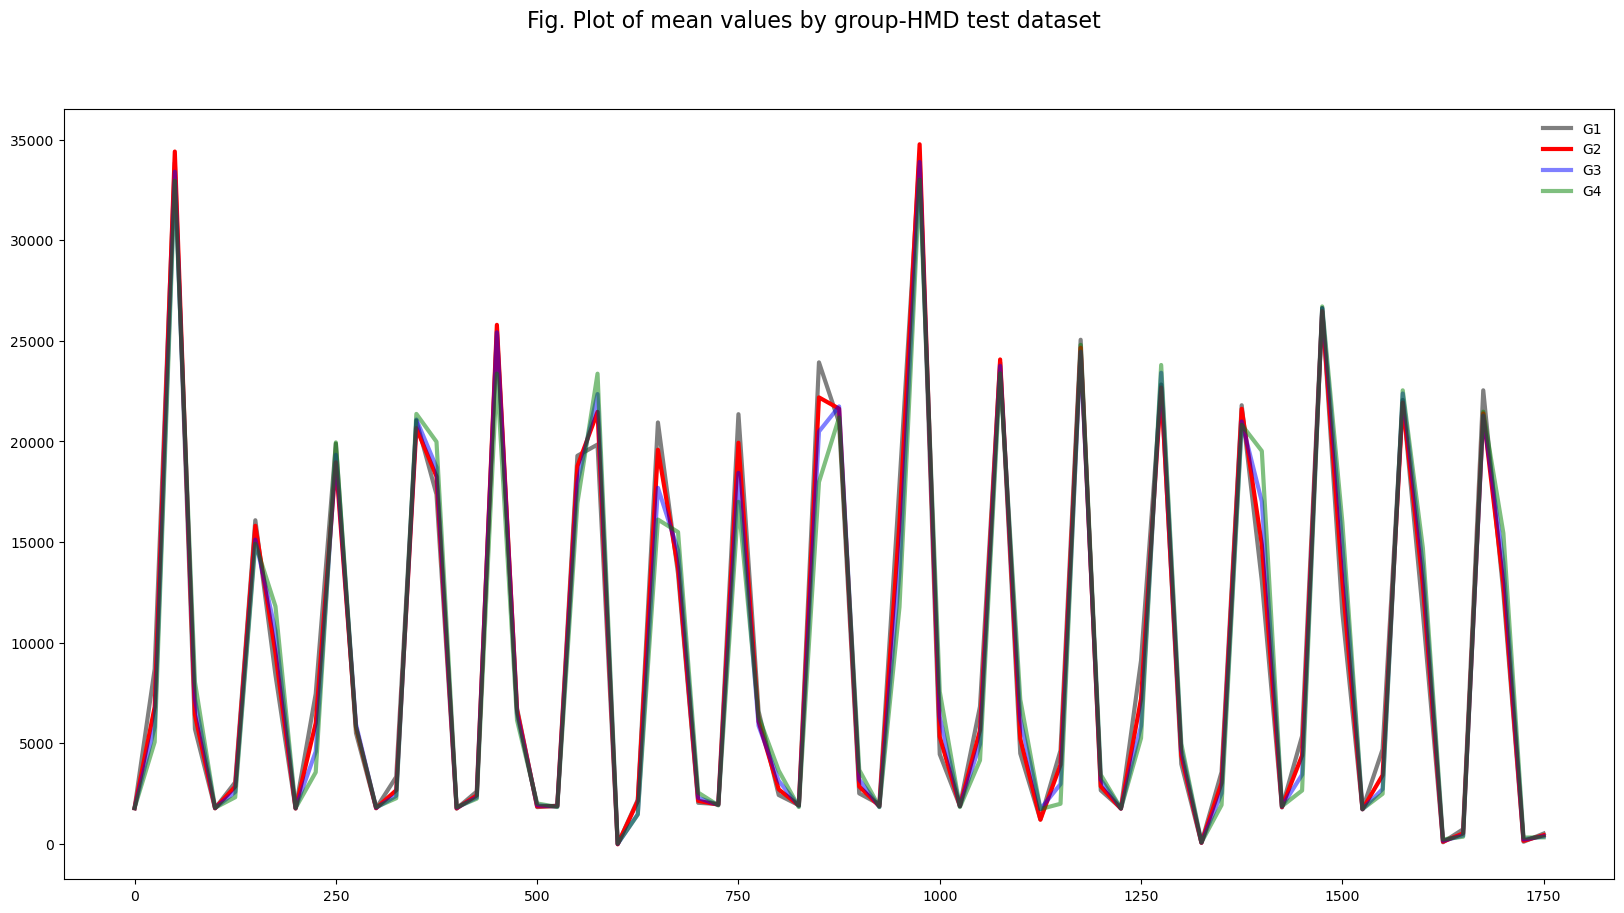

In [111]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(20,10))
ejex=range(0,1751,25)
fig.suptitle("Fig. Plot of mean values by group-HMD test dataset",fontsize=16)
ax.plot(ejex, a1.iloc[0,ejex], color='black',lw=3, alpha=0.5, label='G1')
ax.plot(ejex,a1.iloc[1,ejex], color='red', lw=3, label='G2')
ax.plot(ejex, a1.iloc[2,ejex], color='blue', lw=3, alpha=0.5, label='G3')
ax.plot(ejex, a1.iloc[3,ejex], color='green', lw=3, alpha=0.5, label='G4')
ax.legend(loc='best', frameon=False)

In [112]:
import numpy as np
Xb= np.concatenate((X, Xt),axis=0)
print(Xb.shape)

(524, 1751, 3)


(917524, 3)


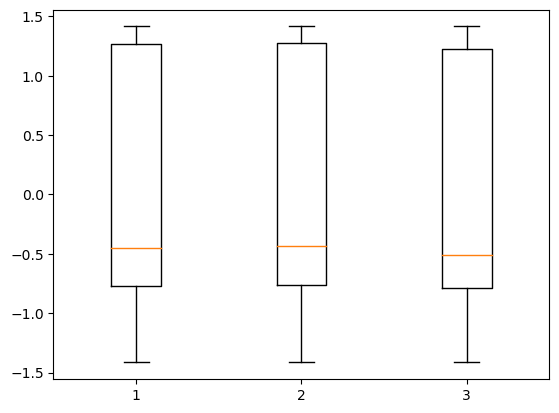

In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#tempo=X.reshape(X.shape[2],-1).T
#print(tempo.shape)
X = scaler.fit_transform(X.reshape(X.shape[2], -1)).reshape(X.shape)
Xb = scaler.fit_transform(Xb.reshape(Xb.shape[2], -1)).reshape(Xb.shape)
Xt = scaler.fit_transform(Xt.reshape(Xt.shape[2], -1)).reshape(Xt.shape)
X1 = Xb.reshape(Xb.shape[2],-1).T
#print(X)
tempodf=pd.DataFrame(X1)
print(tempodf.shape)
pyplot.boxplot(tempodf)
pyplot.show()

In [114]:
#media total testung
meanTe=tempoA1.mean(axis=0)
meanTe.shape

(1751,)

In [115]:
#Distance Training and Testsing
from scipy.spatial import distance
dst = distance.euclidean(meanTr, meanTe)
dst

590724.95500461

In [116]:
#Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
Xest = tempoB.iloc[50,0:1751]
result = adfuller(Xest)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.416802
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


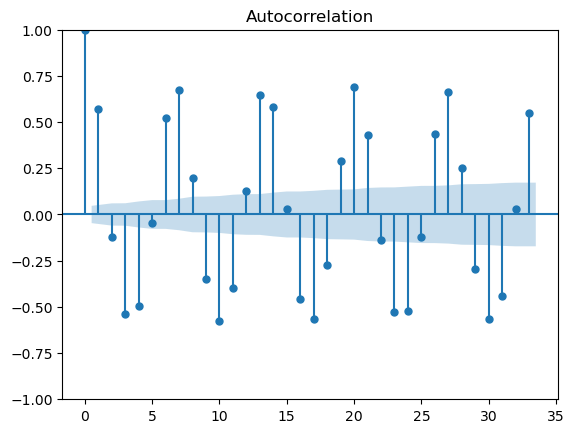

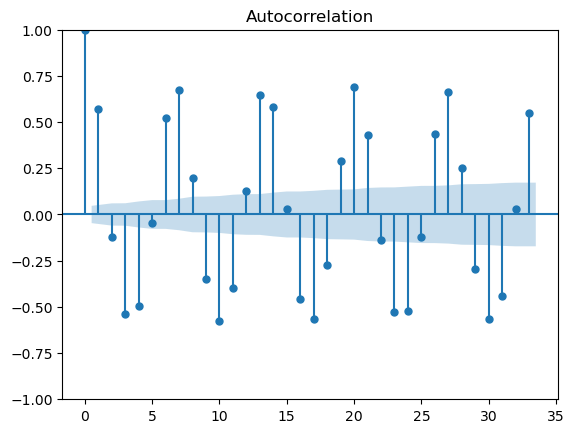

In [133]:
sm.graphics.tsa.plot_acf(Xest, alpha=.05)

In [118]:
Xest = tempoB.iloc[100,0:1751]
result = adfuller(Xest)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.738665
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [119]:
Xest = tempoB.iloc[150,0:1751]
result = adfuller(Xest)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.883446
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [120]:
Xest = tempoB.iloc[200,0:1751]
result = adfuller(Xest)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.063262
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [121]:
Xest = tempoB.iloc[250,0:1751]
result = adfuller(Xest)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.451797
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [122]:
Xest = tempoB.iloc[300,0:1751]
result = adfuller(Xest)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.440282
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [123]:
Xest = tempoB.iloc[350,0:1751]
result = adfuller(Xest)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.456810
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [124]:
Xest = tempoB.iloc[400,0:1751]
result = adfuller(Xest)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.846224
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [125]:
Xest = tempoB.iloc[450,0:1751]
result = adfuller(Xest)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.827505
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [126]:
Xest = tempoB.iloc[500,0:1751]
result = adfuller(Xest)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.520072
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [127]:
Xest = tempoB.iloc[550,0:1751]
result = adfuller(Xest)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.518067
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [128]:
Xest = tempoB.iloc[600,0:1751]
result = adfuller(Xest)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.007664
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [129]:
Xest = tempoB.iloc[650,0:1751]
result = adfuller(Xest)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.362712
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [130]:
Xest = tempoB.iloc[700,0:1751]
result = adfuller(Xest)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.805548
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [131]:
Xest = tempoB.iloc[750,0:1751]
result = adfuller(Xest)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.765664
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
